## Summary
<p>
This projects makes predictions about college admissions with the logistic regression algorithm. The target variable or label is "admitted" to college. 
</p>
<p>
The data set consists of 644 applications with three variables:
</p>
<ul>
<li>gre - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.</li> 
<li>gpa - college grade point average.</li>
<li>admit - binary value. Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.</li>
</ul>

## Import packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Import data

In [42]:
admissions = pd.read_csv("admissions_dq.csv")

## Explore data

In [43]:
admissions.shape

(644, 3)

In [44]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
admit    644 non-null int64
gpa      644 non-null float64
gre      644 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [45]:
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [46]:
admissions.tail()

,admit,gpa,gre
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503
643,1,3.532753,588.986175


In [47]:
admissions.dtypes

admit      int64
gpa      float64
gre      float64
dtype: object

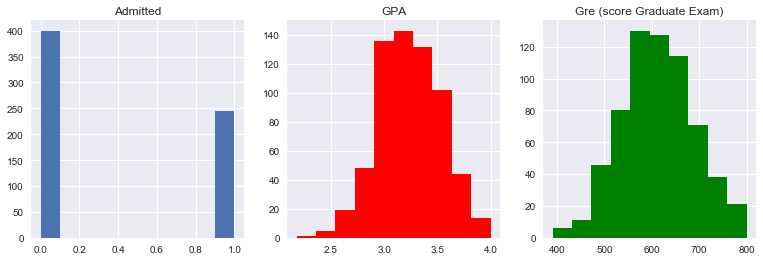

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_figheight(4)
f.set_figwidth(13)
ax1.hist(admissions['admit'])
ax1.set_title("Admitted")
ax2.hist(admissions['gpa'], color="red")
ax2.set_title("GPA")
ax3.hist(admissions['gre'], color="green")
ax3.set_title("Gre (score Graduate Exam)")
plt.show()

The target variable is "Admitted". This variable is binary. The other values are similar to the normal distribution.
This makes sense as scores with the highest frequency are normally around the mean.

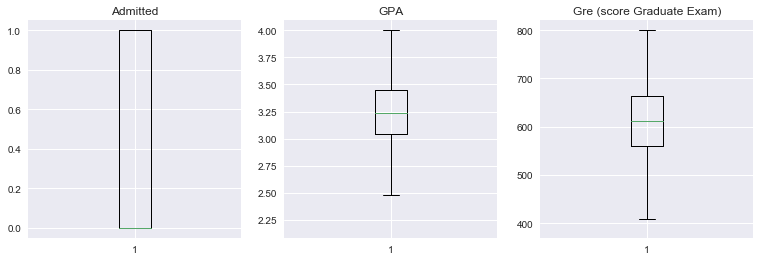

In [49]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_figheight(4)
f.set_figwidth(13)
ax1.boxplot(admissions['admit'])
ax1.set_title("Admitted")
ax2.boxplot(admissions['gpa'])
ax2.set_title("GPA")
ax3.boxplot(admissions['gre'])
ax3.set_title("Gre (score Graduate Exam)")
plt.show()

In [50]:
admission_agg = admissions.groupby('admit').agg(['mean', 'median', 'std', 'count']).round().transpose()
admission_agg['difference'] = admission_agg[1] - admission_agg[0]
admission_agg

admit           0      1  difference
gpa mean      3.0    3.0         0.0
    median    3.0    3.0         0.0
    std       0.0    0.0         0.0
    count   400.0  244.0      -156.0
gre mean    583.0  661.0        78.0
    median  582.0  659.0        77.0
    std      67.0   67.0         0.0
    count   400.0  244.0      -156.0

The gpa difference in median between addmitted or not is 0.196881. 
The gre difference in median between addmitted or not is 76.842001. 
Of the total applicants 244 were addmittd and 400 rejected.

In [51]:
admissions.describe()

,admit,gpa,gre
count,644.000000,644.000000,644.000000
mean,0.378882,3.239936,612.923057
std,0.485486,0.291907,76.637990
min,0.000000,2.177100,390.363563
25%,0.000000,3.045036,560.596793
50%,0.000000,3.234650,612.104848
75%,1.000000,3.448415,663.094697
max,1.000000,4.000000,800.000000


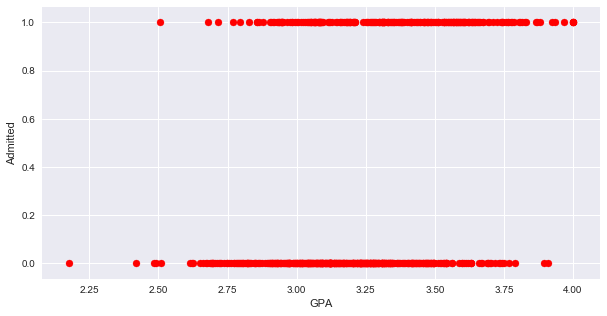

In [52]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x=admissions['gpa'], y=admissions['admit'], color=["red"])
plt.xlabel("GPA")
plt.ylabel("Admitted")
plt.show()

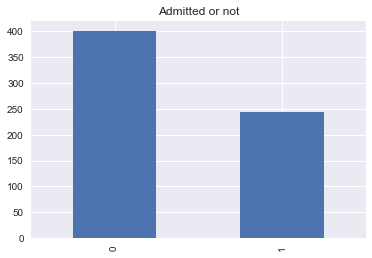

In [53]:
admit_vc = admissions['admit'].value_counts()
admit_vc
admit_vc.plot(kind="bar", title="Admitted or not")

The plot reflects the binary, categorical quality of the variable. However there is a range of value roughly between 2.85 and 3.75 GPA score where admitted or not intersect. GPA cannot be the only decision criterium from admissions.

### Additional cleaning?


Are there any NaN values?

In [54]:
admissions.isnull().sum()

admit    0
gpa      0
gre      0
dtype: int64

### Tidy data?

In [55]:
print(admissions.columns)
admissions.info()
print(admissions['admit'].unique())
print(admissions['gpa'].unique()[0:4])
print(admissions['gre'].unique()[0:4])


def values_not_numerical(series):
    
    values_not_numerical = 0
    
    for v in series:

        if str(v.dtype) == "int64" or str(v.dtype)=="float64":
            values_not_numerical = values_not_numerical + 0
        else:
            values_not_numerical = values_not_numerical + 1
    
    return values_not_numerical

gpa_not_numeric = values_not_numerical(series=admissions['gpa'])
print(gpa_not_numeric)
gre_not_numeric = values_not_numerical(series=admissions['gre'])
print(gre_not_numeric)    

# Column headers are variable names , not values.
# Column header are variable names
# Data points are values, not variable names
# Data points are values
# Variables are stored in both rows and columns - no
# Variables are stored only in columns
# Multiple types in one table
# Multiple variables are not stored in one column

Index(['admit', 'gpa', 'gre'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
admit    644 non-null int64
gpa      644 non-null float64
gre      644 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB
[0 1]
[ 3.17727726  3.41265536  2.72809714  3.09355908]
[ 594.10299158  631.52860672  553.71439893  551.08998512]
0
0


The data is tidy.


## Logistic regression

The target variable is binary. The variables are numeric. This makes it possible to apply a logistic regression model.
Logistic regression calculates the probability of admission or not. The y-results of a logistic regression function must therefore be between 0 and 1. This implies the y-values must be positive and smaller than one and greater than 0.
Above a threshold the probability y-values are understood as yes - admission or no - not. The standard value of sklearn is 0.5.

In [56]:
np.exp(1)

2.7182818284590451

Logistic regression combines two transformations: exponential transformation and normalization.

Exponential transformation: y = e^x

In [57]:
# Producing x-values
x_input_values = np.linspace(-11, 11, 22)
print(len(x_input_values))
print(x_input_values)

y_output_values_exp_tranformation = np.exp(x_input_values)
y_output_values_exp_tranformation

22
[-11.          -9.95238095  -8.9047619   -7.85714286  -6.80952381
  -5.76190476  -4.71428571  -3.66666667  -2.61904762  -1.57142857
  -0.52380952   0.52380952   1.57142857   2.61904762   3.66666667
   4.71428571   5.76190476   6.80952381   7.85714286   8.9047619
   9.95238095  11.        ]


array([  1.67017008e-05,   4.76141319e-05,   1.35740999e-04,
         3.86977945e-04,   1.10321812e-03,   3.14511519e-03,
         8.96626826e-03,   2.55615332e-02,   7.28722319e-02,
         2.07748187e-01,   5.92260016e-01,   1.68844759e+00,
         4.81351974e+00,   1.37226482e+01,   3.91212840e+01,
         1.11529119e+02,   3.17953378e+02,   9.06439067e+02,
         2.58412660e+03,   7.36697096e+03,   2.10021681e+04,
         5.98741417e+04])

Normalization: y = x / (x+1)

In [58]:
y_output_values_normalization = x_input_values / (x_input_values+1)
y_output_values_normalization 

array([ 1.1       ,  1.11170213,  1.12650602,  1.14583333,  1.17213115,
        1.21      ,  1.26923077,  1.375     ,  1.61764706,  2.75      ,
       -1.1       ,  0.34375   ,  0.61111111,  0.72368421,  0.78571429,
        0.825     ,  0.85211268,  0.87195122,  0.88709677,  0.89903846,
        0.90869565,  0.91666667])

Logistic transformation

In [59]:
def logistic_function(x):
    probabilities = np.exp(x) / (1+np.exp(x))
    return probabilities

print("Input values: ",x_input_values[0:5])
# Here are negative values incorporated. 
# Negatives are not allowed in logistic regression and must therefore be transformed.
y_output_values = logistic_function(x_input_values)
print("Output values:", y_output_values )

Input values:  [-11.          -9.95238095  -8.9047619   -7.85714286  -6.80952381]
Output values: [  1.67014218e-05   4.76118649e-05   1.35722576e-04   3.86828251e-04
   1.10200237e-03   3.13525446e-03   8.88658872e-03   2.49244266e-02
   6.79225631e-02   1.72012833e-01   3.71961872e-01   6.28038128e-01
   8.27987167e-01   9.32077437e-01   9.75075573e-01   9.91113411e-01
   9.96864746e-01   9.98897998e-01   9.99613172e-01   9.99864277e-01
   9.99952388e-01   9.99983299e-01]


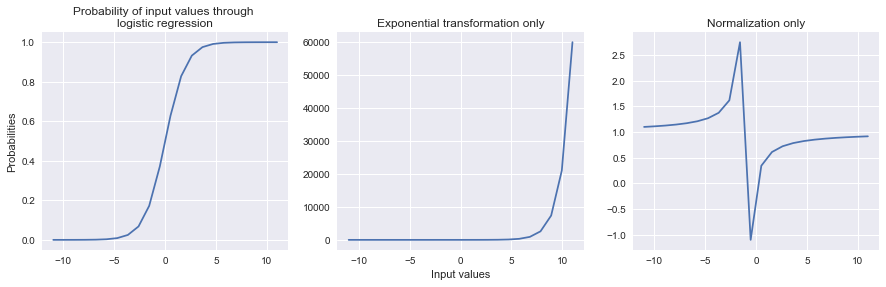

In [60]:
figure = plt.figure(figsize=(15,4))
figure.add_subplot(131)
plt.plot(x_input_values,y_output_values)
plt.ylabel("Probabilities")
plt.title("Probability of input values through \nlogistic regression")
figure.add_subplot(132)
plt.plot(x_input_values,y_output_values_exp_tranformation)
plt.xlabel("Input values")
plt.title("Exponential transformation only")
figure.add_subplot(133)
plt.plot(x_input_values, y_output_values_normalization )
plt.title("Normalization only")
plt.show()


Exponential increases the scale, normalization generates also negative values.

#### Fitting a simple univariate logistic regression model to the admission data

In [61]:
# Target variable: admit
# Feature: gpa
x_12 = admissions[["gpa"]]
y_12 = admissions["admit"]
print(y_12.unique())

logistic_model = LogisticRegression()
logistic_model.fit(x_12, y_12)

[0 1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
probabilities_12 = logistic_model.predict_proba(x_12)
probabilities_12
# every sublist contains the probability of being 0 or 1.

array([[ 0.63387918,  0.36612082],
       [ 0.57129471,  0.42870529],
       [ 0.74047131,  0.25952869],
       ..., 
       [ 0.64994531,  0.35005469],
       [ 0.53382227,  0.46617773],
       [ 0.53831911,  0.46168089]])

In [63]:
0.63387918 +  0.36612082
# both probabilities sum up to one

1.0

Visualizing the probabilities

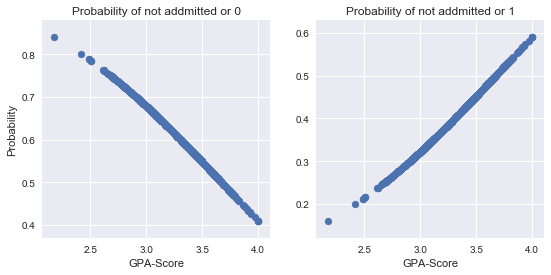

In [64]:
figure = plt.figure(figsize=(9,4))
figure.add_subplot(121)
plt.scatter(x_12, probabilities_12[:,0])
plt.xlabel("GPA-Score")
plt.ylabel("Probability")
plt.title("Probability of not addmitted or 0")
figure.add_subplot(122)
plt.scatter(x_12, probabilities_12[:,1])
plt.xlabel("GPA-Score")
plt.title("Probability of not addmitted or 1")
plt.show()

The probability of being addmitted increases nearly linear with GPA-Score.

Predicting outcomes instead of probabilities given a probability threshold of 0.5.<br>
The discrimination threshold in scikit-learn is set to 0.5 by default when predicting labels.


In [65]:
predictions_33 = logistic_model.predict(x_12)
predictions_33[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [66]:
probabilities_12[0:10,1]

array([ 0.36612082,  0.42870529,  0.25952869,  0.3447954 ,  0.35704522,
        0.48006425,  0.38218472,  0.43075511,  0.46990749,  0.56623396])

#### Calculate the accuracy score directly.

The accuracy is number of true predictions of all observations. <br>
Accuracy (ACC) = Σ True positive + Σ True negative/Σ Total population<br>
https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers

In [67]:
admissions_2 = admissions.copy()
admissions_2["predicted_labels"] = predictions_33
admissions_2=admissions_2.rename(columns={"admit":"actual_label"})
print(admissions_2['predicted_labels'].value_counts())
print(admissions_2.columns)
print(admissions_2[71:75])

0    598
1     46
Name: predicted_labels, dtype: int64
Index(['actual_label', 'gpa', 'gre', 'predicted_labels'], dtype='object')
    actual_label       gpa         gre  predicted_labels
71             0  3.691417  496.273937                 1
72             0  3.116568  650.321216                 0
73             0  2.755856  693.451548                 0
74             0  3.749812  541.426663                 1


In [68]:

true_predictions= admissions_2['actual_label'] == admissions_2['predicted_labels']
true_predictions_df = admissions_2.loc[true_predictions, :]
print(true_predictions_df.head(5))
accuracy_11 = true_predictions_df.shape[0] / admissions_2.shape[0]
print(accuracy_11)

   actual_label       gpa         gre  predicted_labels
0             0  3.177277  594.102992                 0
1             0  3.412655  631.528607                 0
2             0  2.728097  553.714399                 0
3             0  3.093559  551.089985                 0
4             0  3.141923  537.184894                 0
0.6459627329192547


In [69]:
true_positives_2 = admissions_2[(admissions_2['actual_label'] == 1) & (admissions_2['predicted_labels']==1)].shape[0]
print(true_positives_2)

31


In [70]:
true_negatives_2 = admissions_2[(admissions_2['actual_label'] == 0) & (admissions_2['predicted_labels']==0)].shape[0]
print(true_negatives_2)

385


In [71]:
false_negatives_2 = admissions_2[(admissions_2["predicted_labels"] == 0) & (admissions_2["actual_label"] == 1)].shape[0]
false_negatives_2

213

Calculating sensitivity - True Positivity Rate  - identifying positive outcomes

In [72]:
sensitivity_2 = true_positives_2 / (true_positives_2 + false_negatives_2 )
sensitivity_2

0.12704918032786885

In [73]:
false_positives_2 = admissions_2[(admissions_2["predicted_labels"] == 1) & (admissions_2["actual_label"] == 0)].shape[0]
false_positives_2

15

Calculating specificity - True Negative Rate - identifying negative outcomes

In [74]:
specificity = true_negatives_2 / (true_negatives_2 + false_positives_2)
specificity 

0.9625

96 percent of all not admitted observations were correctly predicted. <br>
Specificity and sensitivity are often inversely related and improving one of those can lead to a trade off.

Calculating the accuracy from a contingency table of true versus predicted.

In [75]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
cfm_1 = pd.crosstab(y_12, predictions_33 , rownames=['True'], colnames=['Predicted'], margins=True)
cfm_1 

Predicted,0,1,All
True,,,
0,385,15,400
1,213,31,244
All,598,46,644


In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
tn, fp, fn, tp = confusion_matrix(y_12, predictions_33 ).ravel()
print(tn)
print(fp)
print(fn)
print(tp)

385
15
213
31


In [77]:
accuracy_455 = (tn+tp) / admissions_2.shape[0]
accuracy_455

0.64596273291925466

Calculating sensitivity.

In [78]:
sensitivity = tp / (tp+fn)
sensitivity
# Fraction of students, who are admitted, correctly as such predited

0.12704918032786885

Calculating the accuracy score with sklearn.

In [79]:
accuracy_1 = accuracy_score(y_12, predictions_33 )
accuracy_1

0.64596273291925466

#### Using the same univariate gpa model with a train-test-split.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x_12, y_12, test_size=0.33, random_state=42)


print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

(431, 1)
(431,)
(213, 1)
(213,)


In [81]:
# Instantiate the model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic_model_2 = LogisticRegression()

In [82]:
# Fit the model
logistic_model_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# Predict probabilities on the test data
probabilities_2 = logistic_model_2.predict_proba(X_test)
probabilities_2.shape
# returns 2 a subset of lists containg 1 to 2 columns arrays

(213, 2)

In [84]:
print("All probabilities: ",  probabilities_2[0:25,1])

All probabilities:  [ 0.47475333  0.49835362  0.39679606  0.39153576  0.3774835   0.47067343
  0.33993088  0.48128549  0.45155977  0.37835962  0.3234326   0.36954703
  0.42352487  0.31987869  0.41121772  0.34786321  0.39164892  0.3619093
  0.34583784  0.40867789  0.49124342  0.45018171  0.42130781  0.45554288
  0.53160306]


In [85]:
print("Only probabilities of not admitted: ", probabilities_2[0:25, 0])

Only probabilities of not admitted:  [ 0.52524667  0.50164638  0.60320394  0.60846424  0.6225165   0.52932657
  0.66006912  0.51871451  0.54844023  0.62164038  0.6765674   0.63045297
  0.57647513  0.68012131  0.58878228  0.65213679  0.60835108  0.6380907
  0.65416216  0.59132211  0.50875658  0.54981829  0.57869219  0.54445712
  0.46839694]


In [86]:
print("Only probabilities of admitted: ", probabilities_2[0:25, 1])

Only probabilities of admitted:  [ 0.47475333  0.49835362  0.39679606  0.39153576  0.3774835   0.47067343
  0.33993088  0.48128549  0.45155977  0.37835962  0.3234326   0.36954703
  0.42352487  0.31987869  0.41121772  0.34786321  0.39164892  0.3619093
  0.34583784  0.40867789  0.49124342  0.45018171  0.42130781  0.45554288
  0.53160306]


In [87]:
predictions_2 = logistic_model_2.predict(X_test)
predictions_2.shape
# Make predictions of outcome 1 or 0

(213,)

In [88]:
predictions_2[0:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [89]:
accuracy_2 = accuracy_score(y_test, predictions_2)
accuracy_2

0.676056338028169

In [90]:
print(accuracy_1)
print(accuracy_2)
difference_2 = accuracy_2 - accuracy_1
print(round(difference_2,4))

0.645962732919
0.676056338028
0.0301


The step from the one feature model to the one feature model with train-test-split increases the accuracy of the model of 0.0301. (Other than the root mean score error used in regression models a higher accuracy score is of course good.)

#### Applying a two feature model with a train-test-split

In [91]:
x_4= admissions[["gpa", "gre" ]]
y_4 = admissions["admit"]
print(y_12.unique())
print(x_4.iloc[0:5])

[0 1]
        gpa         gre
0  3.177277  594.102992
1  3.412655  631.528607
2  2.728097  553.714399
3  3.093559  551.089985
4  3.141923  537.184894


In [92]:
# conducting a train-test-split
X_train, X_test, y_train, y_test = train_test_split(x_4, y_4, test_size=0.33, random_state=33)

In [93]:
# Instantiating the Logistic Regression algorithm
logistic_model_4 = LogisticRegression()
# Fit the logistic regression model 
logistic_model_4.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
# predict probabilities
probabilities_4 = logistic_model_4.predict_proba(X_test)
probabilities_4[0:5]

array([[ 0.4635588 ,  0.5364412 ],
       [ 0.79949465,  0.20050535],
       [ 0.57485402,  0.42514598],
       [ 0.82645585,  0.17354415],
       [ 0.51989728,  0.48010272]])

In [95]:
predictions_4 = logistic_model_4.predict(X_test)
predictions_4[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [96]:
# evaluating the model
accuracy_4 = accuracy_score(y_test, predictions_4)
accuracy_4

0.70422535211267601

In [97]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
cfm_2 = pd.crosstab(y_test, predictions_4, rownames=['True'], colnames=['Predicted'], margins=True)
print(cfm_2)
print(type(cfm_2))
tn_2=cfm_2.iloc[0,0]
tp_2=cfm_2.iloc[1,1]
all_observations_2=cfm_2.iloc[2,2]

print(tn_2)
print(tp_2)
print(all_observations_2)

Predicted    0   1  All
True                   
0          115  12  127
1           51  35   86
All        166  47  213
<class 'pandas.core.frame.DataFrame'>
115
35
213


In [98]:
accuracy_41 = (tn+tp)/all_observations_2
accuracy_41

1.9530516431924883

The accuracy_4 score results in a further improvement. The models predicts 70 percent of all observations "admitted" correctly.

In [99]:
# tp and fn are the positive outcomes, while fn are positive outcomes predicted wrongly as negative
sensitivity_41 = (tp) / (tp+fn)
round(sensitivity_41*100,4)


12.7049

14 percent of admitted students are predicted correctly as admitted while 86 percent of admitted students were predicted as not admitted.

Specificity - identifying negative outcomes - fraction of correctly predicted negative outcomes (tn) of overall actually negative outcomes - tn / (tn+fp)

In [100]:
specificity_41 = tn / (tn+fp)
print("Specificity: {}%".format(round(specificity_41*100,2)))

Specificity: 96.25%


The model predicts 96 percent of not admitted students correctly as not admitted.
